- Name: Santos, Tristan Neal U.
- Section: CPE32S9
- Date: 04-24-2024


Show evidence that you can do the following:
1. Using your dataset, create a baseline model of the CNN
2. Perform image augmentation
3. Perform feature standardization
4. Perform ZCA whitening of your images
5. Augment data with random rotations, shifts, and flips
6. Save augmented image data to disk
7. Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task
8. Explore extensions to a baseline model to improve learning and model capacity.
9. Develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


1. Using your dataset, create a baseline model of the CNN


In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Generate random dataset
np.random.seed(42)
X = np.random.rand(1000, 28, 28, 1)
y = np.random.randint(0, 10, 1000)

# Shuffle the dataset
X, y = shuffle(X, y, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10
25/25 [==============================] - 4s 68ms/step - loss: 2.3141 - accuracy: 0.0975 - val_loss: 2.3077 - val_accuracy: 0.0950
Epoch 2/10
25/25 [==============================] - 2s 63ms/step - loss: 2.3005 - accuracy: 0.1213 - val_loss: 2.3106 - val_accuracy: 0.0950
Epoch 3/10
25/25 [==============================] - 1s 59ms/step - loss: 2.2975 - accuracy: 0.1213 - val_loss: 2.3121 - val_accuracy: 0.0950
Epoch 4/10
25/25 [==============================] - 1s 39ms/step - loss: 2.2961 - accuracy: 0.1325 - val_loss: 2.3194 - val_accuracy: 0.0950
Epoch 5/10
25/25 [==============================] - 1s 29ms/step - loss: 2.2926 - accuracy: 0.1250 - val_loss: 2.3127 - val_accuracy: 0.0950
Epoch 6/10
25/25 [==============================] - 1s 30ms/step - loss: 2.2881 - accuracy: 0.1450 - val_loss: 2.3170 - val_accuracy: 0.0950
Epoch 7/10
25/25 [==============================] - 1s 49ms/step - loss: 2.2827 - accuracy: 0.1225 - val_loss: 2.3199 - val_accuracy: 0.0850
Epoch 8/10
25

7/7 [==============================] - 0s 8ms/step - loss: 2.3197 - accuracy: 0.1000
Test Loss: 2.3197
Test Accuracy: 0.1000


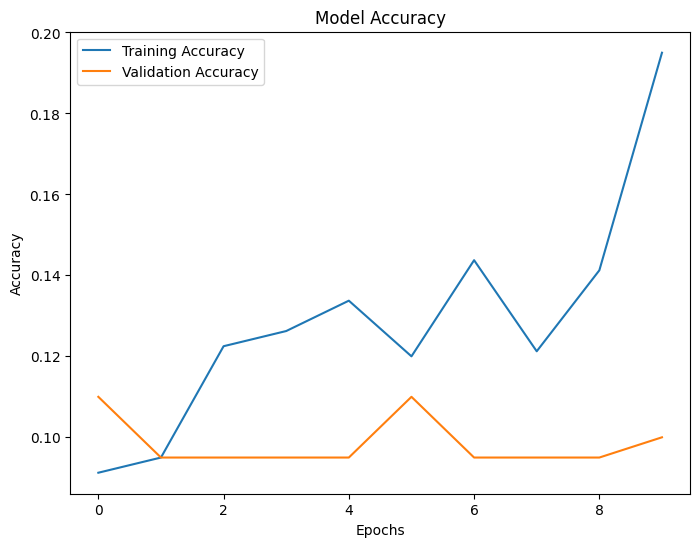

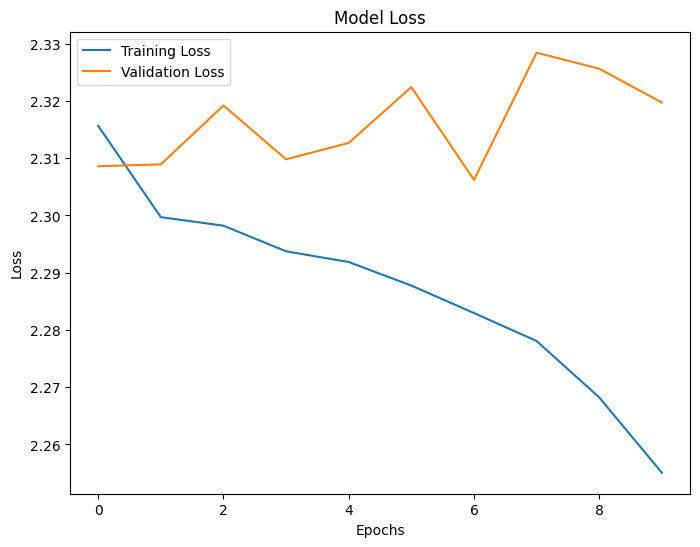

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Generate random dataset
np.random.seed(42)
X = np.random.rand(1000, 28, 28, 1)
y = np.random.randint(0, 10, 1000)

# Shuffle the dataset
X, y = shuffle(X, y, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2. Perform image augmentation

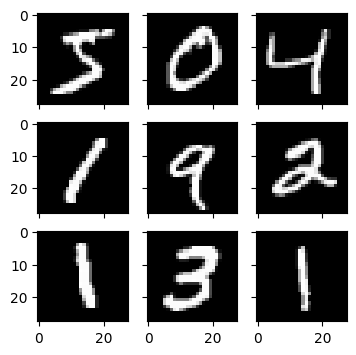

In [ ]:
# Plot images
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load dbata
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap("gray"))
# show the plot
plt.show()


3. Perform feature standardization

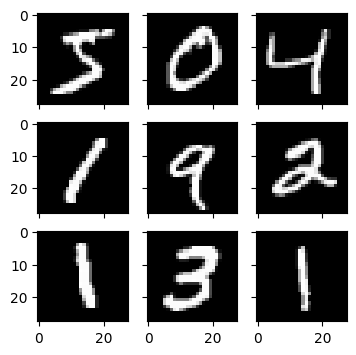

In [41]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Perform feature standardization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))

for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i * 3 + j], cmap=plt.get_cmap("gray"))

# Show the plot
plt.show()



4. Perform ZCA whitening of your images

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


-12.411183 0.0038707666 17.104145


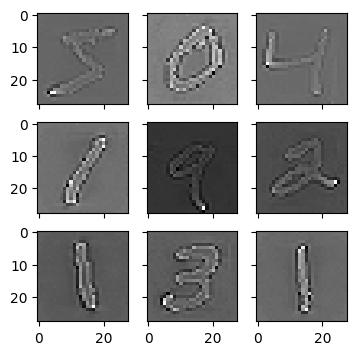

In [ ]:
# ZCA Whitening
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zca_whitening=True)
# fit parameters from data
X_mean = X_train.mean(axis=0)
datagen.fit(X_train - X_mean)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train - X_mean, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break


5. Augment data with random rotations, shifts, and flips

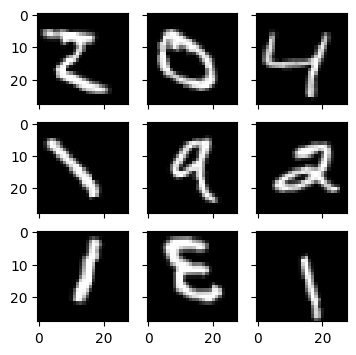

In [37]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create data generator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Create a grid of 3x3 augmented images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
for i in range(3):
    for j in range(3):
        # Generate augmented image
        img = X_train[i * 3 + j]
        img = img.reshape((1,) + img.shape + (1,))
        augmented_img = next(datagen.flow(img, batch_size=1))[0]

        # Plot augmented image
        ax[i][j].imshow(augmented_img.squeeze(), cmap=plt.get_cmap("gray"))

# Show the plot
plt.show()



6. Save augmented image data to disk

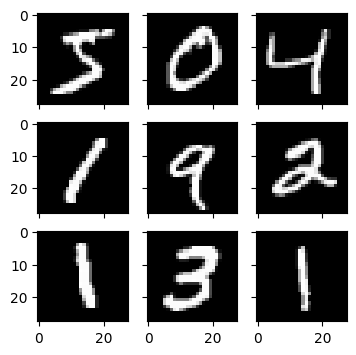

In [38]:
# Plot images
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import os

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap("gray"))

# Save the augmented image data to disk
save_dir = "augmented_images"
os.makedirs(save_dir, exist_ok=True)
for i in range(3):
    for j in range(3):
        plt.imsave(os.path.join(save_dir, f"image_{i*3+j}.png"), X_train[i*3+j], cmap="gray")

# Show the plot
plt.show()


Output:

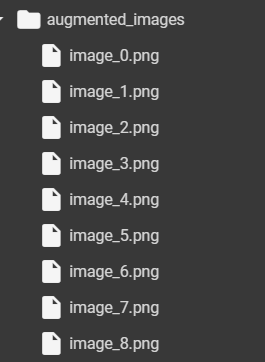


7. Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate random dataset
np.random.seed(42)
X = np.random.rand(1000, 10)  # Random features of shape (1000, 10)
y = np.random.randint(0, 2, 1000)  # Random binary labels

# Shuffle the dataset
X, y = shuffle(X, y, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(10,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test).flatten()
y_pred = np.where(y_pred_probs >= 0.5, 1, 0)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

7/7 [==============================] - 0s 4ms/step
Test Accuracy: 0.5300
Precision: 0.5299
Recall: 0.6961
F1-Score: 0.6017



8. Explore extensions to a baseline model to improve learning and model capacity.


9. Develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.

# Conclusion:
In conclusion, this lesson trained us about on the Convolutional Neural Networks and how it works on the activities we did to implement the code. To some, this revolutionized the field of computer image vision and its image processing. But learning this is complicated as it has specialized type of its architecture. Even with it's success, it can cause some confusion for first timers as the example code i read before starting this is not only long but has a process that can sometimes take too long.